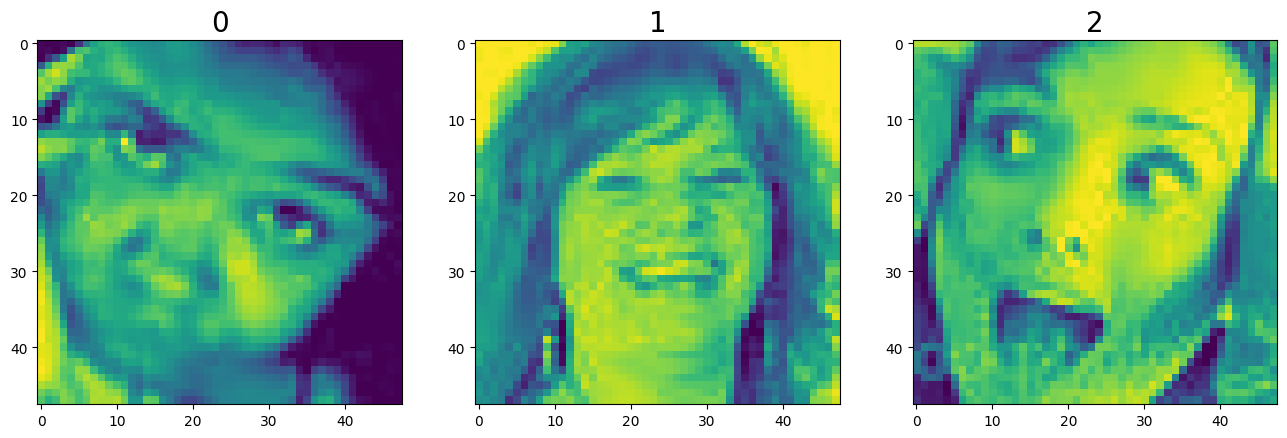

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

#选取 train文件夹 作为图片路径
DATADIR = 'data/train'

# 文件名以N开头的是普通表情的图片，以H开头的是高兴图片，以S开头的是惊讶的图片

#file0-3选取了三个文件夹里的三个表情
file0 = 'N00126.jpg'
file1 = 'H00453.jpg'
file2 = 'R00224.jpg'

# 读取图片
img0 = Image.open(os.path.join(DATADIR, file0))
img0 = np.array(img0)
img1 = Image.open(os.path.join(DATADIR, file1))
img1 = np.array(img1)
img2 = Image.open(os.path.join(DATADIR, file2))
img2 = np.array(img2)

# 画出读取的图片
plt.figure(figsize=(16, 8))

f = plt.subplot(131)
f.set_title('0', fontsize=20)
plt.imshow(img0)

f = plt.subplot(132)
f.set_title('1', fontsize=20)
plt.imshow(img1)

f = plt.subplot(133)
f.set_title('2', fontsize=20)
plt.imshow(img2)
#plt展示出三个表情
plt.show()

In [2]:
import cv2
import random
import numpy as np
import os

# 对读入的图像数据进行预处理
def transform_img(img):
    # 将图片尺寸缩放道 224x224
    img = cv2.resize(img, (224, 224))
    # 读入的图像数据格式是[H, W, C]
    # 使用转置操作将其变成[C, H, W]
    img = np.transpose(img, (2,0,1))
    img = img.astype('float32')
    # 将数据范围调整到[-1.0, 1.0]之间
    img = img / 255.
    img = img * 2.0 - 1.0
    return img

# 定义训练集数据读取器
def data_loader(datadir, batch_size=20, mode = 'train'):
    # 将datadir目录下的文件列出来，每条文件都要读入
    filenames = os.listdir(datadir)
    def reader():
        if mode == 'train':
            # 训练时随机打乱数据顺序
            random.shuffle(filenames)
        batch_imgs = []
        batch_labels = []
        for name in filenames:
            filepath = os.path.join(datadir, name)
            img = cv2.imread(filepath)
            img = transform_img(img)
            #依次读取每张图片的名称首字母用于标记标签
            # N开头表示NORMAL表情用0标签
            # H开头表示HAPPY表情用1标签
            # S开头表示SURPRISE表情用2标签
            if name[0] == 'N':
                label = 0
            elif name[0] == 'H':
                label = 1
            elif name[0] == 'R':
                label = 2
            else:
                raise('Not excepted file name')
            # 每读取一个样本的数据，就将其放入数据列表中
            batch_imgs.append(img)
            batch_labels.append(label)
            if len(batch_imgs) == batch_size:
                # 当数据列表的长度等于batch_size的时候，
                # 把这些数据当作一个mini-batch，并作为数据生成器的一个输出
                imgs_array = np.array(batch_imgs).astype('float32')
                labels_array = np.array(batch_labels).reshape(-1, 1)
                yield imgs_array, labels_array
                batch_imgs = []
                batch_labels = []

        if len(batch_imgs) > 0:
            # 剩余样本数目不足一个batch_size的数据，一起打包成一个mini-batch
            imgs_array = np.array(batch_imgs).astype('float32')
            labels_array = np.array(batch_labels).reshape(-1, 1)
            yield imgs_array, labels_array

    return reader

# 定义验证集数据读取器
def valid_data_loader(datadir, batch_size=20, mode='valid'):
    filenames = os.listdir(datadir)
    def reader():
        batch_imgs = []
        batch_labels = []
            # 根据图片文件名加载图片，并对图像数据作预处理
        for name in filenames:
            filepath = os.path.join(datadir, name)
            # 每读取一个样本的数据，就将其放入数据列表中
            img = cv2.imread(filepath)
            img = transform_img(img)
            #根据名称判断标签
            if name[0] == 'N':
                label = 0
            elif name[0] == 'H':
                label = 1
            elif name[0] == 'R':
                label = 2
            else:
                raise('Not excepted file name')
            # 每读取一个样本的数据，就将其放入数据列表中
            batch_imgs.append(img)
            batch_labels.append(label)
            if len(batch_imgs) == batch_size:
                # 当数据列表的长度等于batch_size的时候，
                # 把这些数据当作一个mini-batch，并作为数据生成器的一个输出
                imgs_array = np.array(batch_imgs).astype('float32')
                labels_array = np.array(batch_labels).reshape(-1, 1)
                yield imgs_array, labels_array
                batch_imgs = []
                batch_labels = []

        if len(batch_imgs) > 0:
            # 剩余样本数目不足一个batch_size的数据，一起打包成一个mini-batch
            imgs_array = np.array(batch_imgs).astype('float32')
            labels_array = np.array(batch_labels).reshape(-1, 1)
            yield imgs_array, labels_array

    return reader

['D:\\PyCharm2022.2\\PyCharm 2022.2\\plugins\\python\\helpers-pro\\jupyter_debug', 'C:\\Users\\20887\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\cv2', 'D:\\PyCharm2022.2\\PyCharm 2022.2\\plugins\\python\\helpers\\pydev', 'D:\\Program03\\数据处理\\综合实习\\任务2.1', 'D:\\Program03\\数据处理', 'C:\\Users\\20887\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'C:\\Users\\20887\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', 'C:\\Users\\20887\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'C:\\Users\\20887\\AppData\\Local\\Programs\\Python\\Python311', '', 'C:\\Users\\20887\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\Users\\20887\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages', 'C:\\Users\\20887\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32', 'C:\\Users\\20887\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\20887\\AppData\\Local\\Programs\\Python\\Python311

ImportError: ERROR: recursion is detected during loading of "cv2" binary extensions. Check OpenCV installation.